# Statsmodels
* Statsmodels是Python的统计建模和计量经济学工具包，包括一些描述统计、统计模型估计和推断。
* http://statsmodels.sourceforge.net/devel/

In [4]:
from pandas import DataFrame,Series
import pandas as pd

import numpy as np
from IPython.display import Image

import re

## 分布检验

### 1 正态性检验

## 七、T-test
* T 检验

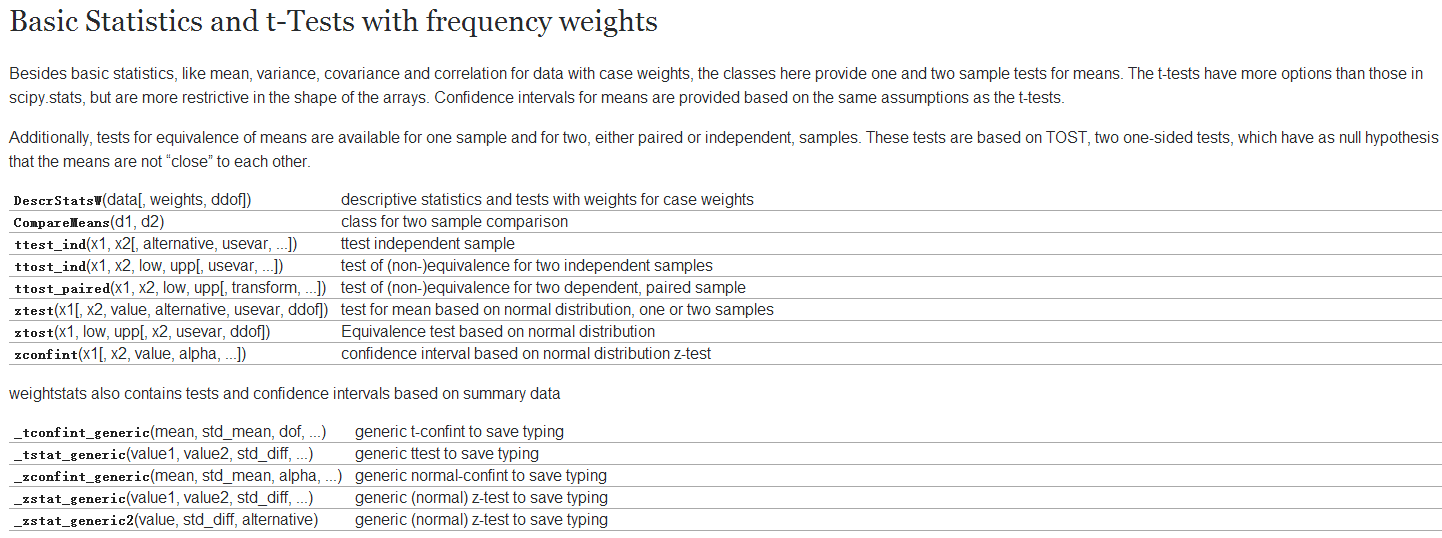

In [36]:
Image(filename="picture\Statistic Tests 8.png")

### 1 单样本t检验

### 2 独立样本t检验

### 3 配对样本t检验

## 八、ANOVA
* 方差分析模型

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore = sm.datasets.get_rdataset("Moore", "car",cache=True) # load data
data = moore.data
data = data.rename(columns={"partner.status" :"partner_status"}) # make name pythonic
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
print table

                                              sum_sq  df          F    PR(>F)
C(fcategory, Sum)                          11.614700   2   0.276958  0.759564
C(partner_status, Sum)                    212.213778   1  10.120692  0.002874
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2   4.184623  0.022572
Residual                                  817.763961  39        NaN       NaN


In [28]:
Image(filename="picture\ANOVA.png")

### 1 单因素方差分析

### 2 多因素方差分析

### 3 重复测量方差分析

## 九、事后检验及多重比较

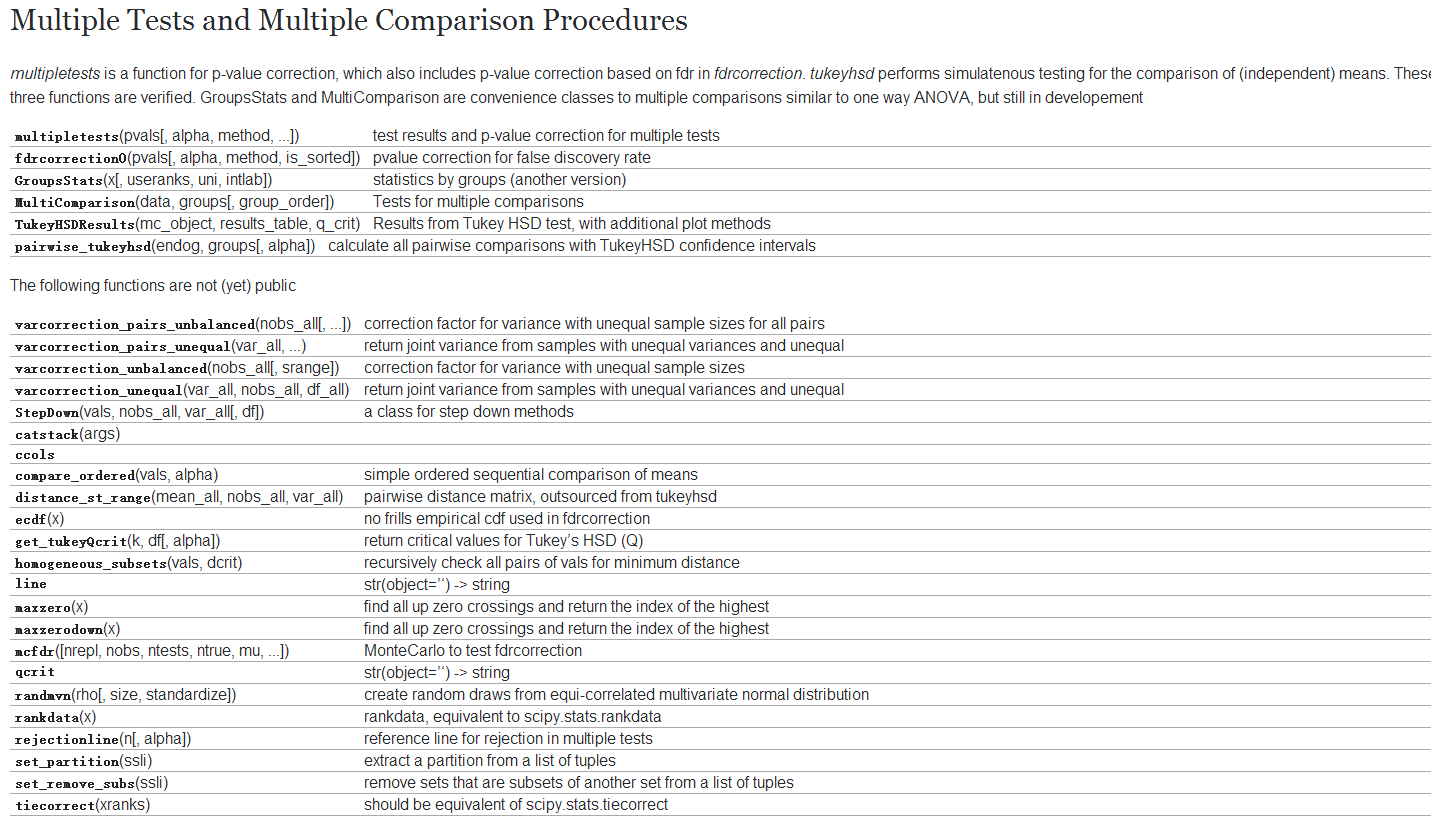

In [38]:
Image(filename="picture\Statistic Tests 7.png")

### 1 事后检验

### 2 多重比较

## 十、Nonparametric estimators & Nonparametric Methods
* 非参检验

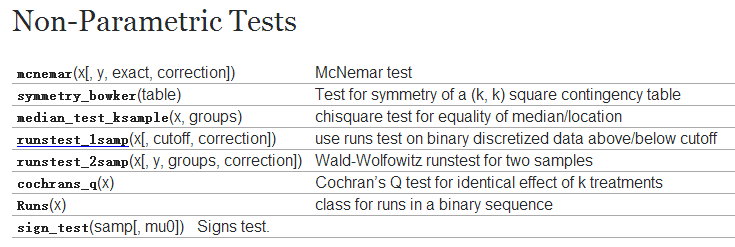

In [41]:
Image(filename="picture\Statistic Tests 5.png")

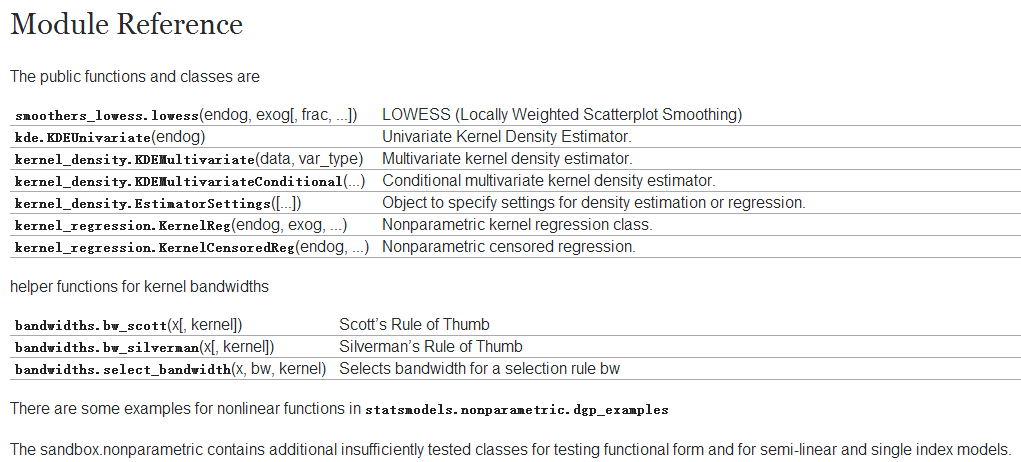

In [45]:
Image(filename="picture\Nonparametric Methods.png")

## 一、Linear Regression Models
* 线性回归模型

In [3]:
# Load modules and data
import numpy as np
import statsmodels.api as sm
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(spector_data.endog, spector_data.exog)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Mon, 21 Nov 2016   Prob (F-statistic):            0.00157
Time:                        18:35:20   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

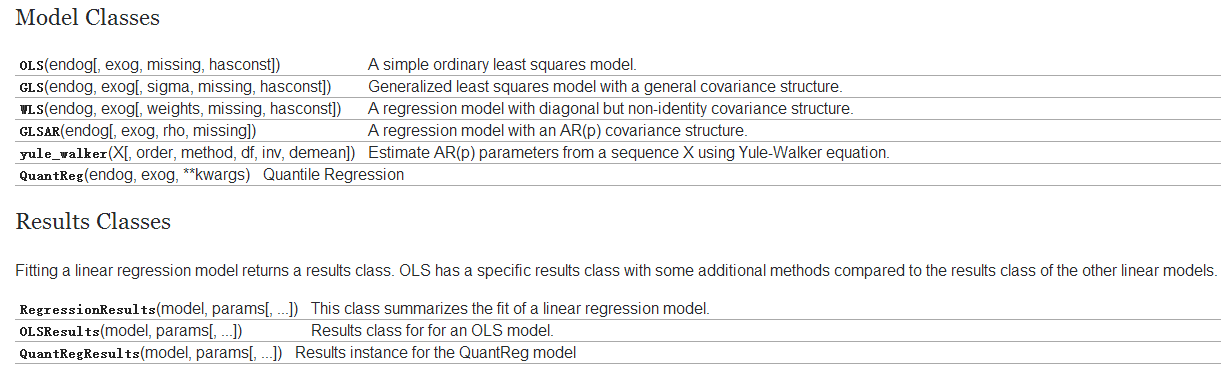

In [5]:
Image(filename="picture\Linear Regression Model.png")

## 二、Generalized Linear Models
* 一般线型模型，主要用于各种设计的方差分析

In [9]:
# Load modules and data
import statsmodels.api as sm
data = sm.datasets.scotland.load()
data.exog = sm.add_constant(data.exog)

# Instantiate a gamma family model with the default link function.
gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())
gamma_results = gamma_model.fit()

print gamma_results.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                0.00358428317349
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Mon, 21 Nov 2016   Deviance:                     0.087389
Time:                        18:40:33   Pearson chi2:                   0.0860
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0178      0.011     -1.548      0.122        -0.040     0.005
x1          4.962e-05   1.62e-05      3.060      0.0

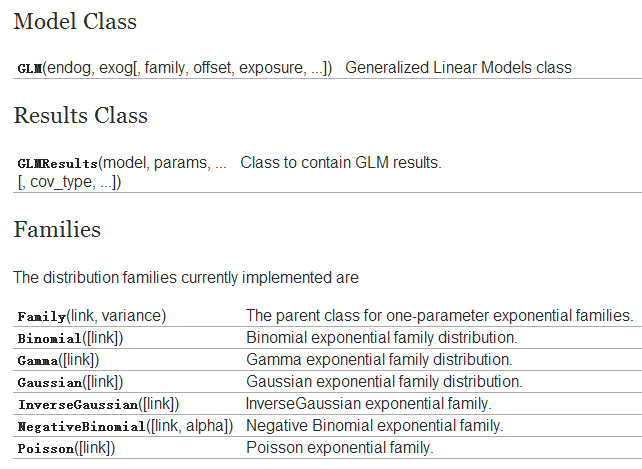

In [12]:
Image(filename="picture\Generalized Linear Models.png")

## 三、Generalized Estimating Equations
* 广义估计方程

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset('epil', package='MASS').data

fam = sm.families.Poisson()
ind = sm.cov_struct.Exchangeable()
mod = smf.gee("y ~ age + trt + base", "subject", data,
              cov_struct=ind, family=fam)
res = mod.fit()
print res.summary()

                               GEE Regression Results                              
Dep. Variable:                           y   No. Observations:                  236
Model:                                 GEE   No. clusters:                       59
Method:                        Generalized   Min. cluster size:                   4
                      Estimating Equations   Max. cluster size:                   4
Family:                            Poisson   Mean cluster size:                 4.0
Dependence structure:         Exchangeable   Num. iterations:                    51
Date:                     Mon, 21 Nov 2016   Scale:                           5.087
Covariance type:                    robust   Time:                         18:48:46
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.5730      0.361      1.589      0.112        -0.134

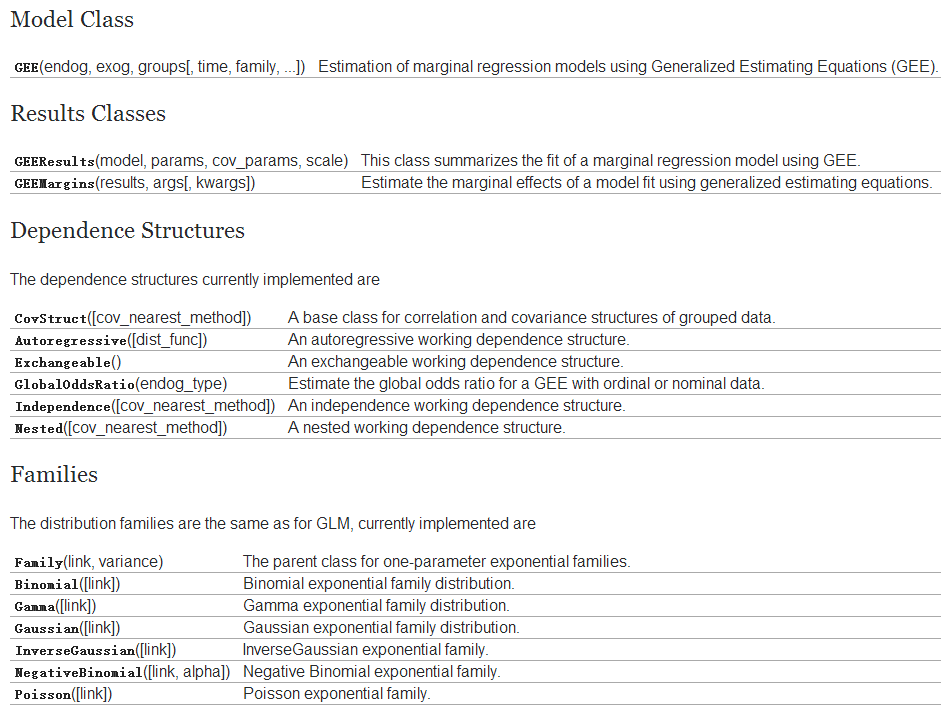

In [17]:
Image(filename="picture\Generalized Estimating Equations.png")

## 四、Robust Linear Models
* 

In [ ]:
# Load modules and data
import statsmodels.api as sm
data = sm.datasets.stackloss.load()
data.exog = sm.add_constant(data.exog)

# Fit model and print summary
rlm_model = sm.RLM(data.endog, data.exog, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()
print rlm_results.params

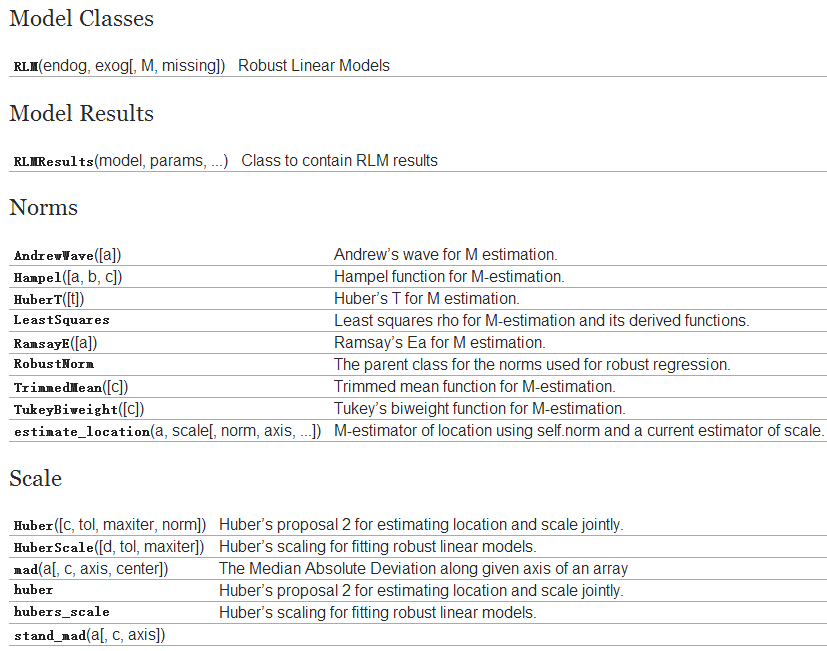

In [18]:
Image(filename="picture\Robust Linear Models.png")

## 五、Linear Mixed Effects Models
* 线性混合效应模型
* http://blog.csdn.net/myprograminglife/article/details/47114053

In [23]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset('dietox', 'geepack').data

md = smf.mixedlm('Weight ~ Time', data, groups=data['Pig']) 
mdf = md.fit() 
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3668   
Min. group size:  11      Likelihood:         -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.180 17.269
Time          6.942    0.033 207.939 0.000  6.877  7.008
Intercept RE 40.399    2.166                            



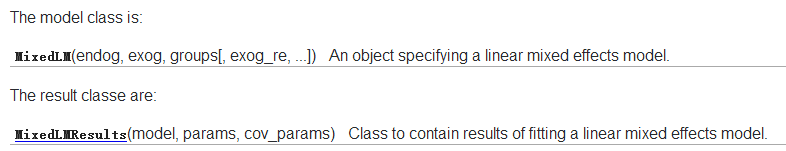

In [24]:
Image(filename="picture\Linear Mixed Effects Models.png")

## 六、Regression with Discrete Dependent Variable
* 离散变量的回归模型

In [25]:
# Load the data from Spector and Mazzeo (1980)
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog)

# Logit Model
logit_mod = sm.Logit(spector_data.endog, spector_data.exog)
logit_res = logit_mod.fit()
print logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Nov 2016   Pseudo R-squ.:                  0.3740
Time:                        19:09:57   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
                                        LLR p-value:                  0.001502
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -13.0213      4.931     -2.641      0.008       -22.687    -3.356
x1             2.8261      1.

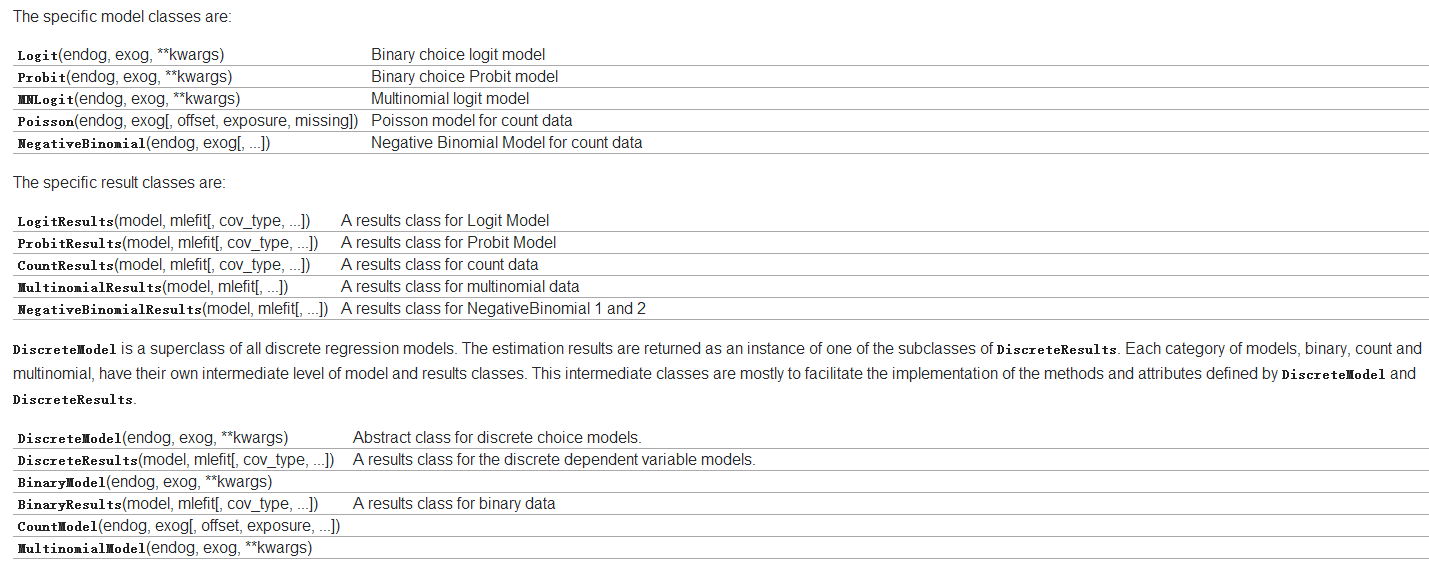

In [26]:
Image(filename="picture\Regression with Discrete Dependent Variable.png")

## 十一、Statistic Tests
* 各种统计检验

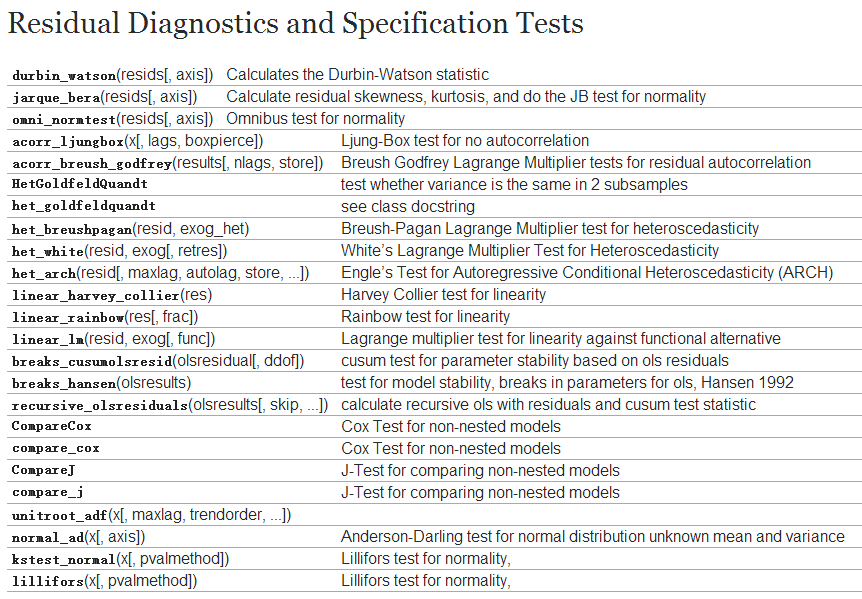

In [29]:
Image(filename="picture\Statistic Tests.png")

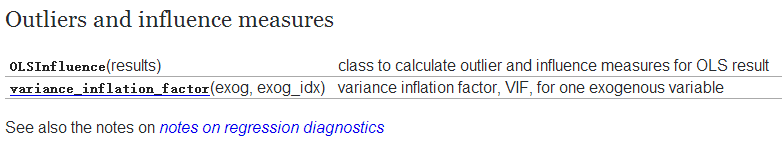

In [31]:
Image(filename="picture\Statistic Tests 2.png")

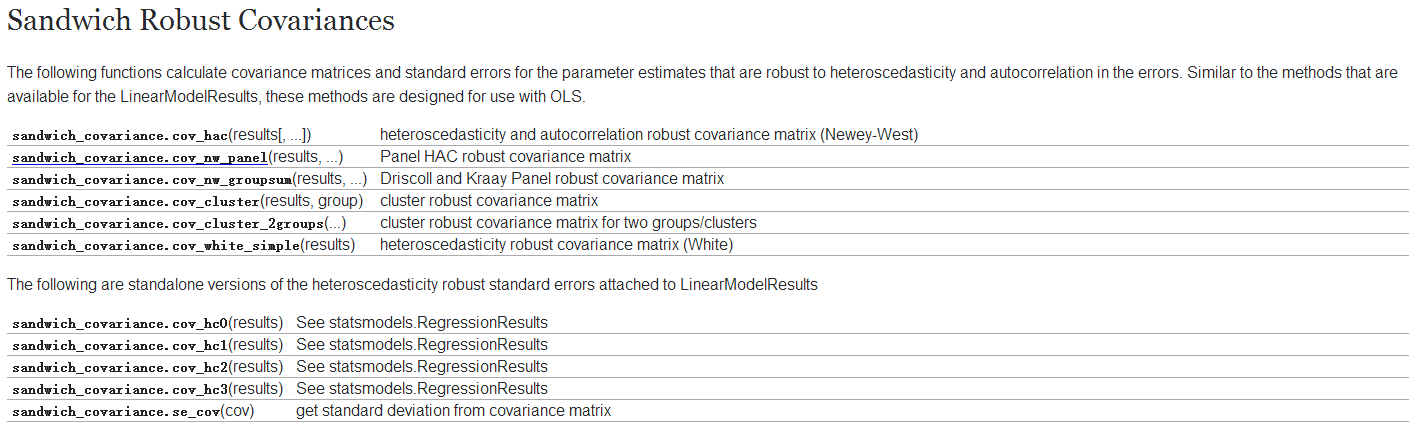

In [43]:
Image(filename="picture\Statistic Tests 3.png")

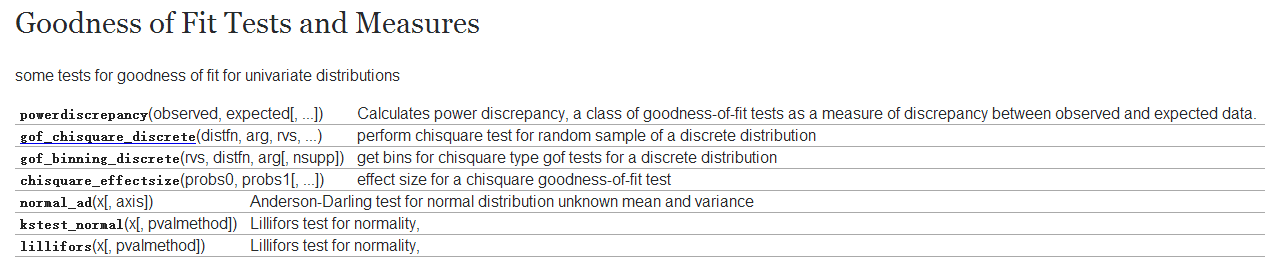

In [42]:
Image(filename="picture\Statistic Tests 4.png")

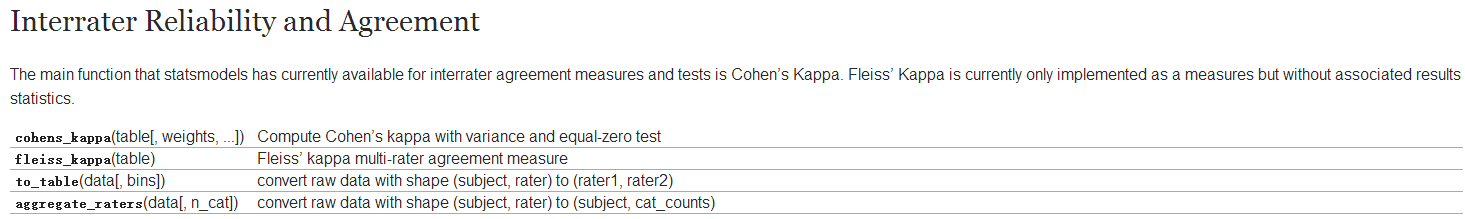

In [39]:
Image(filename="picture\Statistic Tests 6.png")

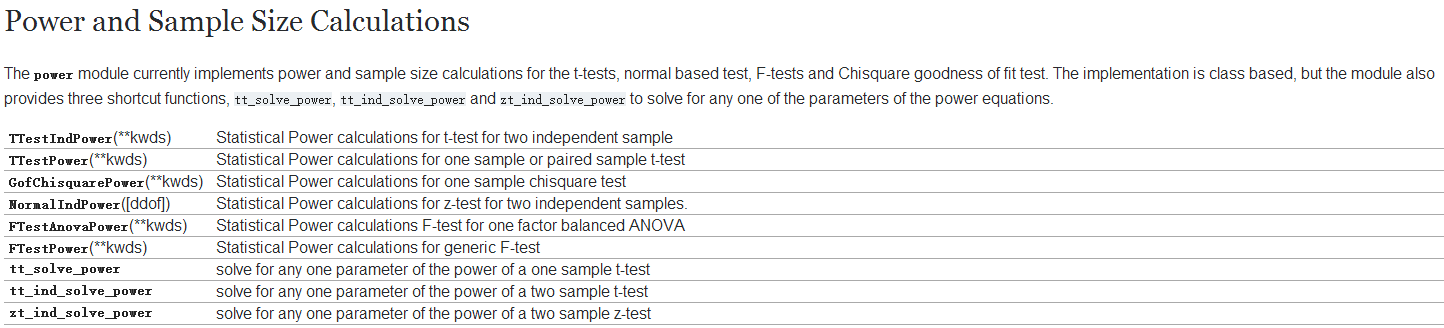

In [34]:
Image(filename="picture\Statistic Tests 9.png")

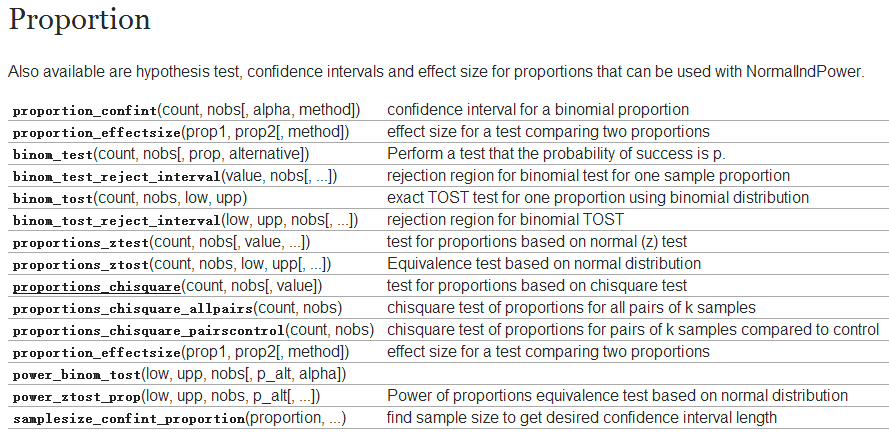

In [33]:
Image(filename="picture\Statistic Tests 10.png")

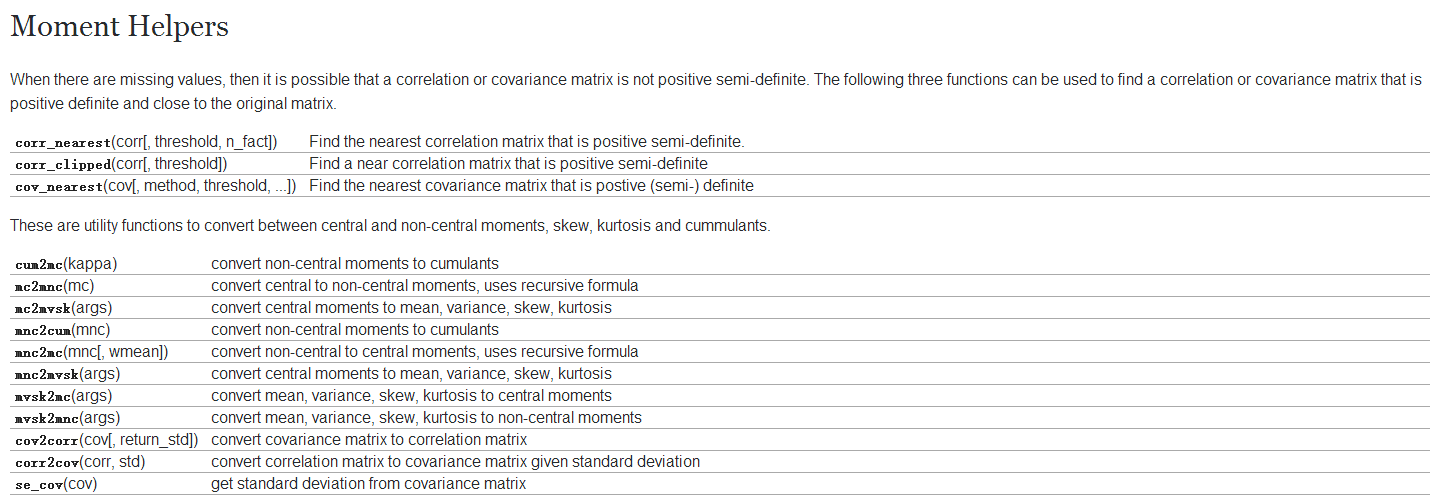

In [32]:
Image(filename="picture\Statistic Tests 11.png")

## 十二、Time series analysis
* 时间序列分析
* http://statsmodels.sourceforge.net/devel/tsa.html

## 十三、Models for Survival and Duration Analysis
* 生存分析

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset("flchain", "survival").data
del data["chapter"]
data = data.dropna()
data["lam"] = data["lambda"]
data["female"] = (data["sex"] == "F").astype(int)
data["year"] = data["sample.yr"] - min(data["sample.yr"])
status = data["death"].values

mod = smf.phreg("futime ~ 0 + age + female + creatinine + "
                "np.sqrt(kappa) + np.sqrt(lam) + year + mgus",
                data, status=status, ties="efron")
rslt = mod.fit()
print(rslt.summary())

                           Results: PHReg
Model:                      PH Reg         Sample size:         6524
Dependent variable:         futime         Num. events:         1962
Ties:                       Efron                                   
--------------------------------------------------------------------
                log HR log HR SE   HR      t    P>|t|  [0.025 0.975]
--------------------------------------------------------------------
age             0.1012    0.0025 1.1065 40.9289 0.0000 1.1012 1.1119
female         -0.2817    0.0474 0.7545 -5.9368 0.0000 0.6875 0.8280
creatinine      0.0134    0.0411 1.0135  0.3271 0.7436 0.9351 1.0985
np.sqrt(kappa)  0.4047    0.1147 1.4988  3.5288 0.0004 1.1971 1.8766
np.sqrt(lam)    0.7046    0.1117 2.0230  6.3056 0.0000 1.6251 2.5183
year            0.0477    0.0192 1.0489  2.4902 0.0128 1.0102 1.0890
mgus            0.3160    0.2532 1.3717  1.2479 0.2121 0.8350 2.2532
Confidence intervals are for the hazard ratios


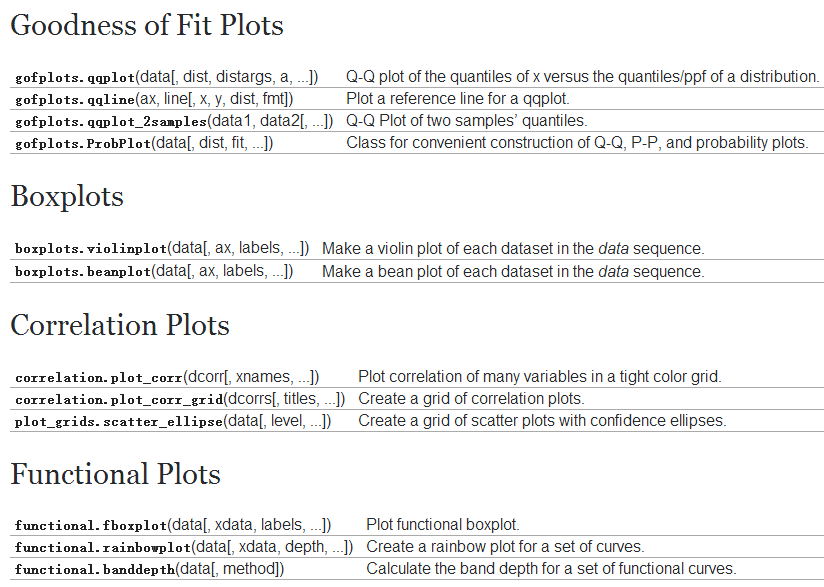

In [50]:
Image(filename="picture\Graphics.png")

## 十四、Discrete choice models：离散选择模型
* logit模型属于离散选择模型，主要用于微观计量经济学范畴

## 十五、Input-Output
* 以各种方式输出表格：text，latex，html；读取各种格式的数据

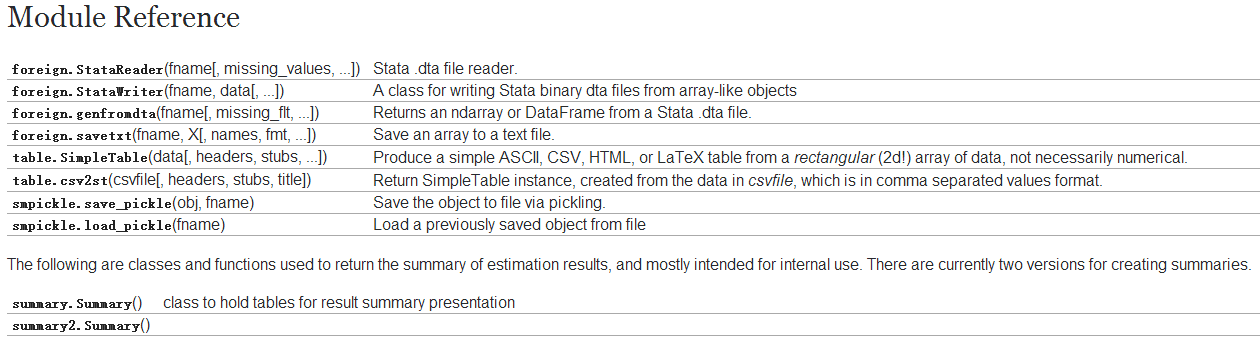

In [51]:
Image(filename="picture\Input-Output.png")

## 十六、Graphics
* 绘图功能

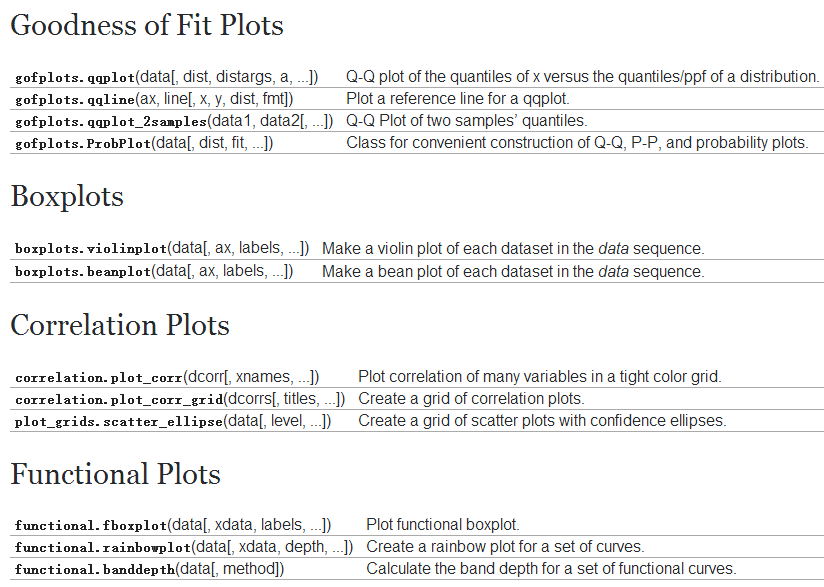

In [46]:
Image(filename="picture\Graphics.png")

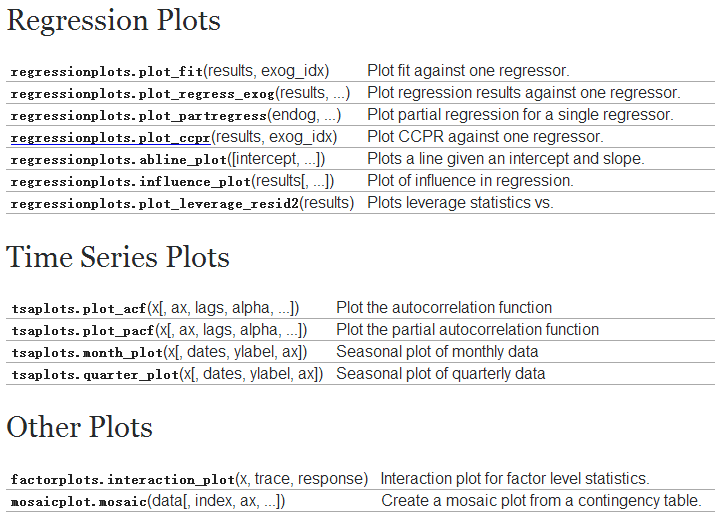

In [47]:
Image(filename="picture\Graphics 2.png")

## 十七、extensive unit tests to ensure correctness of results:
* 大量的整体检验以保证结果的正确性